# Importing The Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

tf.__version__


'2.4.0'

##  Part 1 - Data Preprocessing

### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(	rescale = 1./255,
	shear_range = 0.2,
	zoom_range = 0.2,
	horizontal_flip = True)
training_set = train_datagen.flow_from_directory('data/train',
	target_size =(64,64),
	batch_size = 10,
	class_mode ='categorical')

Found 102 images belonging to 3 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(	'data/test',
	target_size =(64,64),
	batch_size = 10,
	class_mode='categorical')

Found 24 images belonging to 3 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=[64,64,3]))

### Step 2 - Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#### Adding a second convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(64,3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#### Adding a third convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(128,3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#### Adding a fourth convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(256,3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

## Part 3 - Training the CNN 

### Compiling the CNN

In [13]:
cnn.compile(optimizer ='adam',loss='categorical_crossentropy',	metrics=['accuracy'])


### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
epochs =83

In [15]:
history = cnn.fit(x=training_set,validation_data=test_set,epochs=epochs )

Epoch 1/83
11/11 [==============================] - 3s 294ms/step - loss: 1.1234 - accuracy: 0.3995 - val_loss: 1.0739 - val_accuracy: 0.4167
Epoch 2/83
11/11 [==============================] - 3s 264ms/step - loss: 1.0876 - accuracy: 0.3853 - val_loss: 1.0272 - val_accuracy: 0.4167
Epoch 3/83
11/11 [==============================] - 3s 233ms/step - loss: 1.0762 - accuracy: 0.3913 - val_loss: 0.9643 - val_accuracy: 0.4167
Epoch 4/83
11/11 [==============================] - 3s 231ms/step - loss: 1.0101 - accuracy: 0.4430 - val_loss: 0.9871 - val_accuracy: 0.4583
Epoch 5/83
11/11 [==============================] - 2s 224ms/step - loss: 1.0385 - accuracy: 0.4559 - val_loss: 0.8549 - val_accuracy: 0.5417
Epoch 6/83
11/11 [==============================] - 2s 225ms/step - loss: 0.9016 - accuracy: 0.6120 - val_loss: 0.7900 - val_accuracy: 0.7083
Epoch 7/83
11/11 [==============================] - 2s 226ms/step - loss: 0.9239 - accuracy: 0.5067 - val_loss: 0.7386 - val_accuracy: 0.7083
Epoch 

11/11 [==============================] - 3s 238ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.0136e-04 - val_accuracy: 1.0000
Epoch 59/83
11/11 [==============================] - 3s 232ms/step - loss: 0.0145 - accuracy: 0.9975 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 60/83
11/11 [==============================] - 3s 235ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 61/83
11/11 [==============================] - 3s 279ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 62/83
11/11 [==============================] - 3s 243ms/step - loss: 0.0243 - accuracy: 0.9737 - val_loss: 4.7883e-05 - val_accuracy: 1.0000
Epoch 63/83
11/11 [==============================] - 3s 247ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.3572e-05 - val_accuracy: 1.0000
Epoch 64/83
11/11 [==============================] - 3s 244ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.7156e-05 - val_accuracy: 1.

## Part 4 - Adding Graphs of Accuracy and Loss

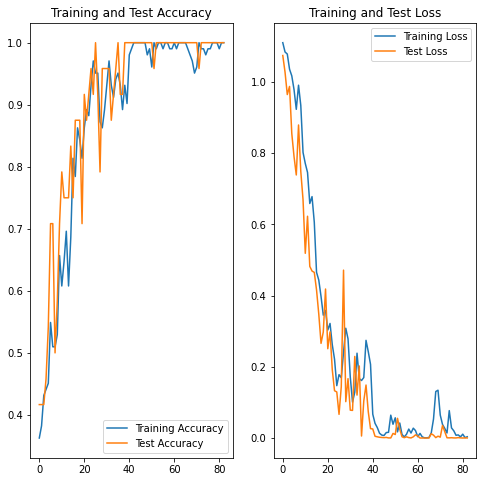

In [16]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()

## Part 5 - Making  Predictions with Tkinter GUI

In [17]:
import numpy as np
from keras.preprocessing import image   
from tkinter import *
from tkinter import filedialog
import os
import tkinter as tk
from PIL import Image, ImageTk 

global imgs
global label_cong2

def showimage():
    fln = filedialog.askopenfilename(initialdir=os.getcwd(),title="Select Image File",filetypes=(("JPEG File","*.jpeg"),("JPG File","*.jpg"),("PNG File","*.png"),("All Files","*.*")))
    imgs = Image.open(fln)
    imgs.thumbnail((350,350))
    imgs = ImageTk.PhotoImage(image=imgs,size=(64,64))
    lbl.configure(image=imgs)
    lbl.image = imgs
    test_image = image.load_img(fln, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    print(np.argmax(result))
    training_set.class_indices
    if result[0][0] > 0.5:
        prediction = 'Bengu'
        record = 'No criminal record'
        print(result)
    elif result[0][1] > 0.5:
        prediction = 'Irmak'
        record = 'No criminal record'
        print(result)
    elif result[0][2] > 0.5:
        prediction = 'Yusuf'
        record = 'No criminal record'
        print(result)
        
    result_text = "Prediction: " + str(prediction) + '\n' + str(record)
    text_var.set(result_text)
    

def closewindow():
    root.destroy()
    

root=Tk()

frm=Frame(root)
frm.pack(side=BOTTOM, padx=15, pady=15)

lbl = Label(root)
lbl.pack()

btn = Button(frm, text="Browse Image",command=showimage)
btn.pack(side=tk.LEFT)
text_var = StringVar()
text_var.set("WELCOME")
label_cong2 = Label ( root , anchor = CENTER , textvariable = text_var, bg = 'gray80' , fg = 'gray20' ,
           font = ( "Helvetica" , 16  ,"bold" ) )
label_cong2.pack ( expand = 1 , ipadx = "15" , ipady ="12" )


btn2 = Button(frm, text="Exit",command=closewindow)
btn2.pack(side=tk.LEFT, padx=10)

root.title("Image Browser")
root.geometry("700x550")
root.mainloop()




 



0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
2
[[0. 0. 1.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
1
[[0. 1. 0.]]
0
[[1. 0. 0.]]
1
[[0. 1. 0.]]
1
[[0. 1. 0.]]
1
[[0. 1. 0.]]
1
[[0. 1. 0.]]
2
[[0. 0. 1.]]
1
[[0. 1. 0.]]
0
[[1. 0. 0.]]
1
[[0. 1. 0.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
0
[[1. 0. 0.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]


Exception in Tkinter callback
Traceback (most recent call last):
  File "A:\Anaconda\lib\site-packages\PIL\Image.py", line 2895, in open
    fp.seek(0)
AttributeError: 'str' object has no attribute 'seek'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "A:\Anaconda\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-17-92f4e57a7767>", line 14, in showimage
    imgs = Image.open(fln)
  File "A:\Anaconda\lib\site-packages\PIL\Image.py", line 2897, in open
    fp = io.BytesIO(fp.read())
AttributeError: 'str' object has no attribute 'read'


0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
0
[[1. 0. 0.]]
1
[[0. 1. 0.]]
1
[[0. 1. 0.]]
1
[[0. 1. 0.]]
1
[[0. 1. 0.]]
1
[[0. 1. 0.]]
1
[[0. 1. 0.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
2
[[0. 0. 1.]]
